In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, random
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [2]:

# Replace 'file_path.csv' with the path to your CSV file
file_path = "C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/Raw_data/merged_dataset.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()
df.tail()

,B1x,B1y,B2x,B2y,B3x,B3y,B4x,B4y,time,measurement_id
44154875,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122,2.979213e+06,2155
44154876,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164,2.979213e+06,2155
44154877,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007,2.979213e+06,2155
44154878,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105,2.979213e+06,2155
44154879,-0.098,-0.166,0.012,-0.552,-0.071,0.588,-0.159,0.232,2.979213e+06,2155


# Sumlating Data with np.random.randn

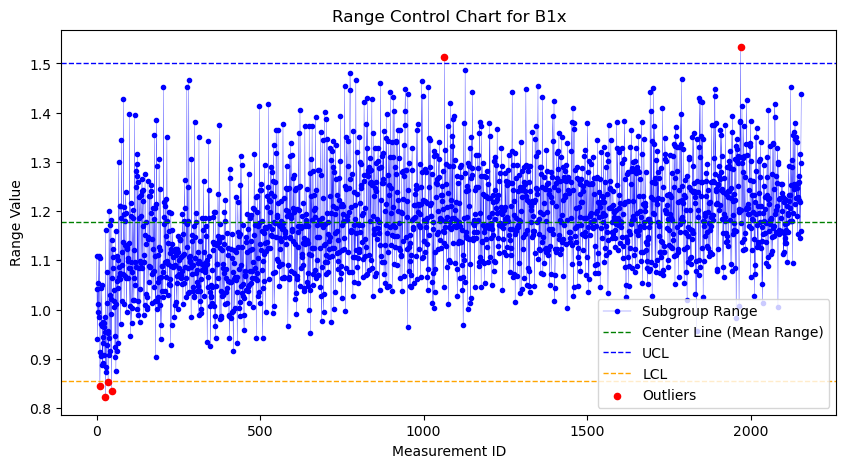

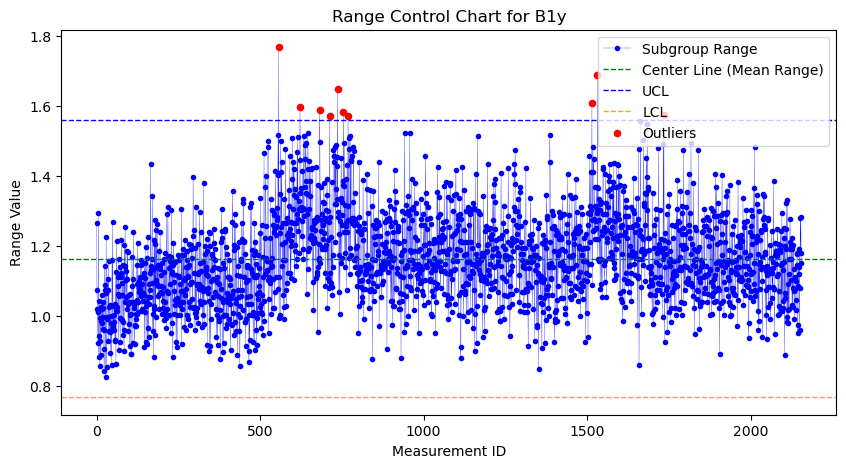

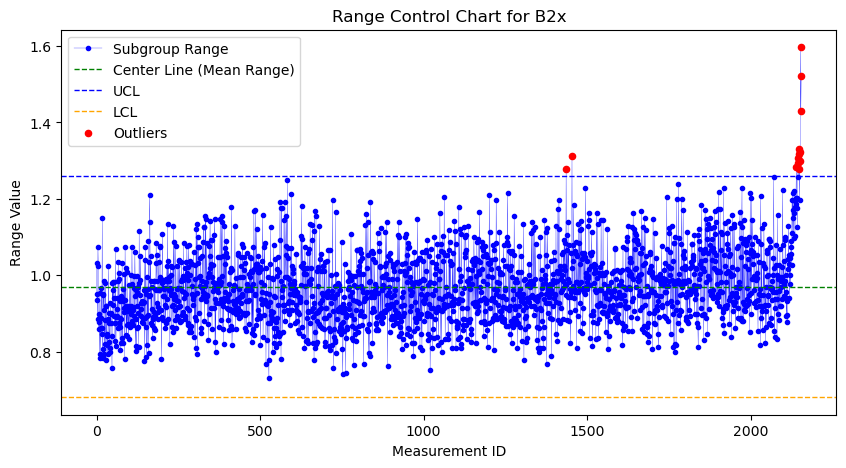

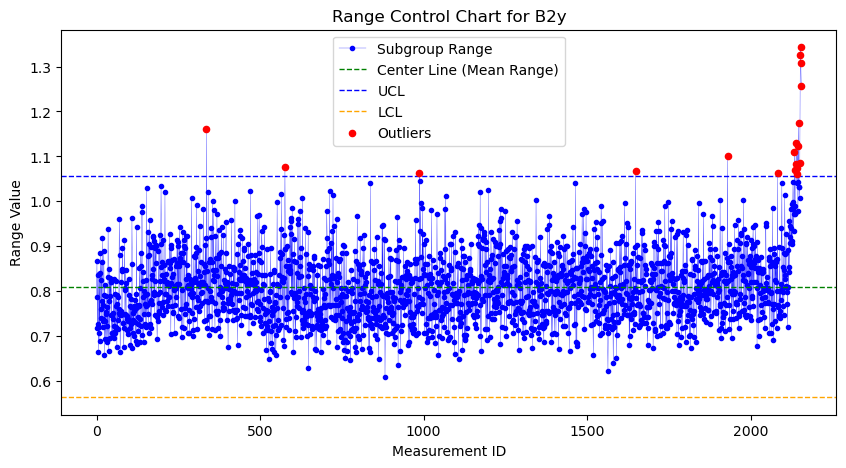

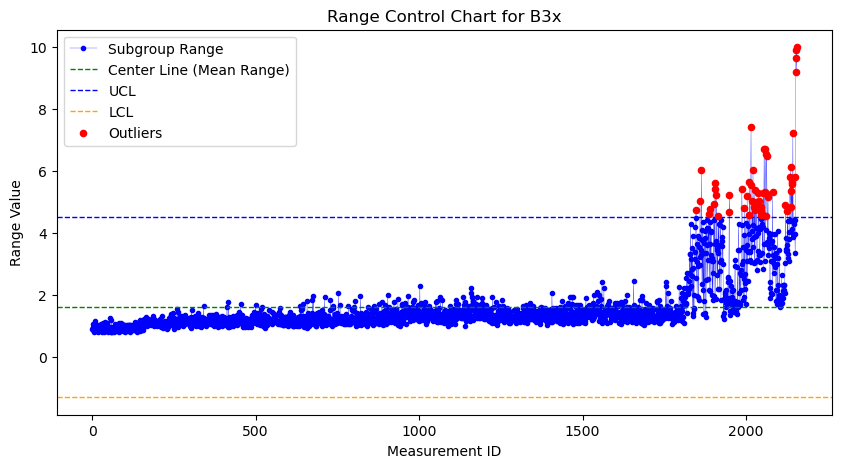

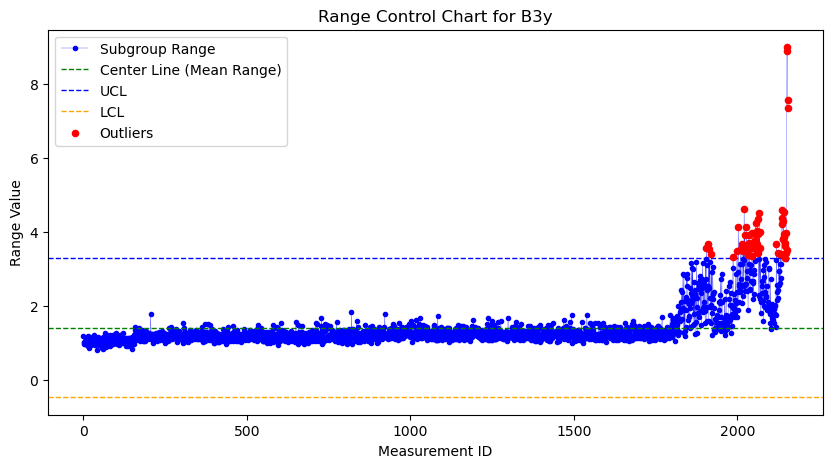

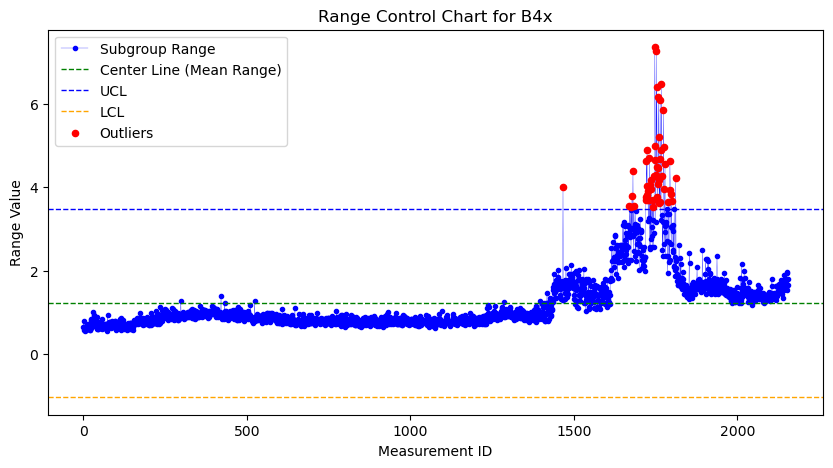

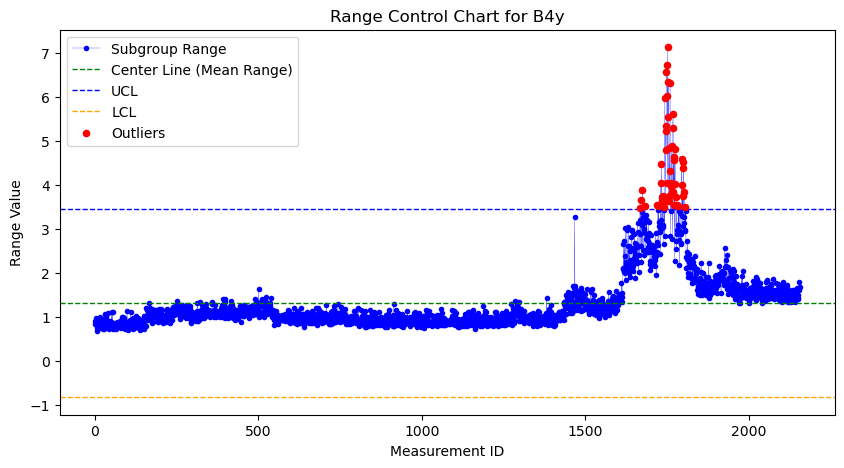

In [3]:
import matplotlib.pyplot as plt

def plot_range_chart(data, column_name):
    # Calculate the range for each subgroup
    subgroup_ranges = data.groupby('measurement_id')[column_name].apply(lambda x: x.max() - x.min())
    
    # Calculate the mean and standard deviation of the ranges
    range_mean = subgroup_ranges.mean()
    range_std = subgroup_ranges.std()  # Standard deviation of the ranges
    
    # Define control limits
    ucl = range_mean + 3 * range_std
    lcl = range_mean - 3 * range_std
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(subgroup_ranges.index, subgroup_ranges, marker='o', linestyle='-', color='b', markersize=3, lw=0.2, label='Subgroup Range')
    plt.axhline(y=range_mean, color='green', linestyle='--', lw=1, label='Center Line (Mean Range)')
    plt.axhline(y=ucl, color='blue', linestyle='--', lw=1, label='UCL')
    plt.axhline(y=lcl, color='orange', linestyle='--', lw=1, label='LCL')
    
    # Highlighting outliers
    outliers = subgroup_ranges[(subgroup_ranges > ucl) | (subgroup_ranges < lcl)]
    plt.scatter(outliers.index, outliers, color='red', label='Outliers', zorder=5, s= 20)
    
    plt.title(f'Range Control Chart for {column_name}')
    plt.xlabel('Measurement ID')
    plt.ylabel('Range Value')
    plt.legend()
    plt.show()

# Column names for each bearing axis
columns = ['B1x', 'B1y', 'B2x', 'B2y', 'B3x', 'B3y', 'B4x', 'B4y']

# Generate a range control chart for each column
for column in columns:
    plot_range_chart(df, column)


## Trial

### In this section we try to find a way to create the simulation. In order to run the simulation go to the Simulation section

In [4]:
sample_data = df[(df['measurement_id'] >= 3) & (df['measurement_id'] <= 103)]

def calculate_ranges(data, column_name):
    # Calculate the range for each subgroup within the provided data
    subgroup_ranges = data.groupby('measurement_id')[column_name].apply(lambda x: x.max() - x.min())
    return subgroup_ranges

ranges = calculate_ranges(sample_data, 'B1x')
ranges

measurement_id
3      1.055
4      1.011
5      0.996
6      1.106
7      0.984
       ...  
99     1.084
100    1.397
101    1.008
102    1.084
103    0.947
Name: B1x, Length: 101, dtype: float64

In [5]:
q = np.array(ranges)
q_mean = np.mean(q)
q_std = np.std(q)
n = len(q)
fake_q = np.random.randn(n-1) * q_std + q_mean
w = 3
smooth_fake = []

for i in range(n - w):
    smooth_fake.append(np.mean(fake_q[i: i + w]))

smooth_fake = np.array(smooth_fake) * np.sqrt(w) - q_mean * np.sqrt(w) + q_mean
len(smooth_fake)

98

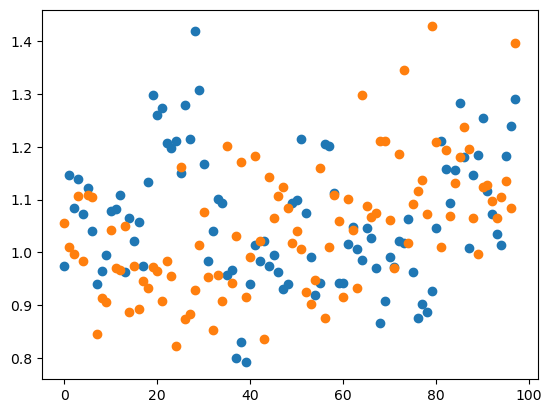

In [6]:
q = np.array(ranges)
q_mean = np.mean(q)
q_std = np.std(q)
n = len(q)
fake_q = np.random.randn(n-1) * q_std + q_mean
w = 3
smooth_fake = []

for i in range(n - w):
    smooth_fake.append(np.mean(fake_q[i: i + w]))

smooth_fake = np.array(smooth_fake) * np.sqrt(w) - q_mean * np.sqrt(w) + q_mean
plt.scatter(range(98), smooth_fake [ :98])
plt.scatter(range(98), q [:98])
plt.show()

## Simulating B1X

In [7]:
b1x_data = df[['B1x', 'measurement_id']]
b1x_data

,B1x,measurement_id
0,-0.022,0
1,-0.105,0
2,-0.183,0
3,-0.178,0
4,-0.208,0
...,...,...
44154875,-0.168,2155
44154876,-0.112,2155
44154877,-0.081,2155
44154878,-0.115,2155


In [8]:
subgroup_ranges_b1x = b1x_data.groupby('measurement_id')['B1x'].apply(lambda x: x.max() - x.min())
subgroup_ranges_b1x

measurement_id
0       1.108
1       1.042
2       0.940
3       1.055
4       1.011
        ...  
2151    1.145
2152    1.316
2153    1.159
2154    1.298
2155    1.438
Name: B1x, Length: 2156, dtype: float64

In [9]:
len(subgroup_ranges_b1x)

2156

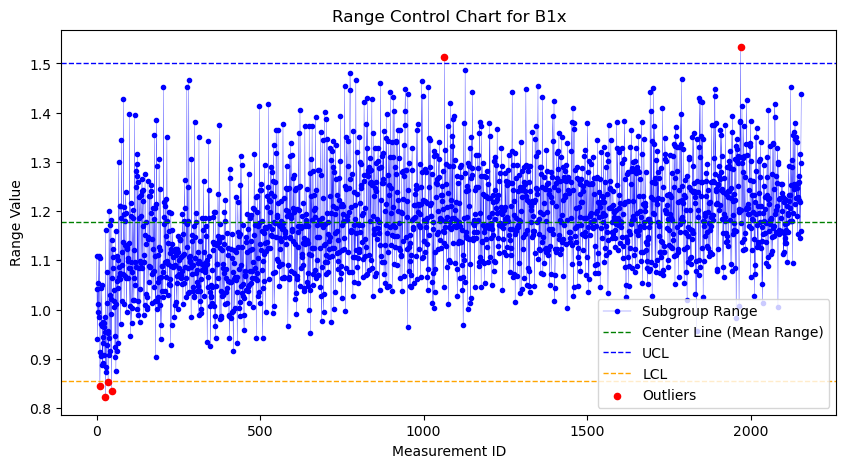

In [10]:
plot_range_chart(df, 'B1x')

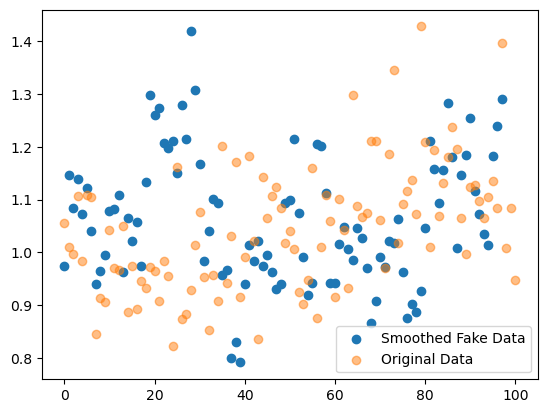

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming subgroup_ranges_b1x is already loaded as a numpy array
import numpy as np
import pandas as pd

def simulate_and_smooth_data(real_data, window=3, add_mean_edges=True, scale_data=False):
    """
    Simulates and smooths data based on the statistical properties of the input data.
    
    Parameters:
        real_data (array-like): The actual data to base the simulation on.
        window (int): The width of the rolling mean window.
        add_mean_edges (bool): If True, sets the first and last values of the smoothed data
                               to the mean of the simulated data.
        scale_data (bool): If True, applies scaling to the smoothed data.
        
    Returns:
        np.array: The smoothed and optionally scaled simulated data.
    """
    # Convert input data to numpy array if it isn't one
    q = np.array(real_data)
    
    # Statistics of original data
    q_mean = np.mean(q)
    q_std = np.std(q)
    n = len(q)
    
    # Generate simulated data
    fake_q = np.random.randn(n) * q_std + q_mean
    
    # Apply rolling mean smoothing
    smooth_fake = np.convolve(fake_q, np.ones(window) / window, mode='same')
    
    # Optionally adjust the first and last elements
    if add_mean_edges:
        simulated_mean = np.mean(fake_q)
        smooth_fake[0] = simulated_mean
        smooth_fake[-1] = simulated_mean
    
    # Optionally scale the smoothed data
    if scale_data:
        smooth_fake = smooth_fake * np.sqrt(window) - q_mean * np.sqrt(window) + q_mean
    
    return smooth_fake

# Example usage
subgroup_ranges_b1x = np.random.normal(0, 1, 2156)  # Example data array
smoothed_databx1_month1 = simulate_and_smooth_data(subgroup_ranges_b1x, window=3, add_mean_edges=True, scale_data=True)


# Plotting for comparison
plt.scatter(range(len(smooth_fake)), smooth_fake, label='Smoothed Fake Data')
plt.scatter(range(n), q, label='Original Data', alpha=0.5)
plt.legend()
plt.show()



In [18]:
smoothed_databx1_month1

array([ 0.00540958, -0.9838491 , -0.60057191, ...,  0.32101603,
       -0.47458994,  0.00540958])

In [19]:
len(smoothed_databx1_month1)

2156

In [20]:
len(subgroup_ranges_b1x)

2156

In [21]:
range(0, len(smoothed_databx1_month1))

range(0, 2156)

In [22]:
smoothed_databx1_month1_df = pd.DataFrame({'B1x': smoothed_databx1_month1, 'Measurement_ID': range(0, len(smoothed_databx1_month1))})
smoothed_databx1_month1_df

,B1x,Measurement_ID
0,0.005410,0
1,-0.983849,1
2,-0.600572,2
3,-0.084511,3
4,-0.419459,4
...,...,...
2151,-0.737118,2151
2152,-0.290287,2152
2153,0.321016,2153
2154,-0.474590,2154


In [23]:
subgroup_ranges_b1x = np.random.normal(0, 1, 2156)  # Example data array
smoothed_databx1_month2 = simulate_and_smooth_data(subgroup_ranges_b1x, window=3, add_mean_edges=True, scale_data=True)
smoothed_databx1_month2_df = pd.DataFrame({'B1x': smoothed_databx1_month2, 'Measurement_ID': range(0, len(smoothed_databx1_month2))})



subgroup_ranges_b1x = np.random.normal(0, 1, 2156)  # Example data array
smoothed_databx1_month3 = simulate_and_smooth_data(subgroup_ranges_b1x, window=3, add_mean_edges=True, scale_data=True)
smoothed_databx1_month3_df = pd.DataFrame({'B1x': smoothed_databx1_month3, 'Measurement_ID': range(0, len(smoothed_databx1_month3))})


subgroup_ranges_b1x = np.random.normal(0, 1, 2156)  # Example data array
smoothed_databx1_month4 = simulate_and_smooth_data(subgroup_ranges_b1x, window=3, add_mean_edges=True, scale_data=True)
smoothed_databx1_month4_df = pd.DataFrame({'B1x': smoothed_databx1_month4, 'Measurement_ID': range(0, len(smoothed_databx1_month4))})


subgroup_ranges_b1x = np.random.normal(0, 1, 2156)  # Example data array
smoothed_databx1_month5 = simulate_and_smooth_data(subgroup_ranges_b1x, window=3, add_mean_edges=True, scale_data=True)
smoothed_databx1_month5_df = pd.DataFrame({'B1x': smoothed_databx1_month5, 'Measurement_ID': range(0, len(smoothed_databx1_month5))})




In [24]:
subgroup_ranges_b1x_df = pd.DataFrame({'B1x': subgroup_ranges_b1x, 'Measurement_ID': range(0, len(subgroup_ranges_b1x))})
subgroup_ranges_b1x_df

,B1x,Measurement_ID
0,-0.586175,0
1,-0.459441,1
2,-0.664291,2
3,0.845351,3
4,1.509619,4
...,...,...
2151,-0.655821,2151
2152,0.861232,2152
2153,-0.435226,2153
2154,-1.233367,2154


In [25]:
smoothed_databx1_month1_df

,B1x,Measurement_ID
0,0.005410,0
1,-0.983849,1
2,-0.600572,2
3,-0.084511,3
4,-0.419459,4
...,...,...
2151,-0.737118,2151
2152,-0.290287,2152
2153,0.321016,2153
2154,-0.474590,2154


In [26]:
print(len(subgroup_ranges_b1x_df))
print(len(smoothed_databx1_month1_df))
print(len(smoothed_databx1_month2_df))
print(len(smoothed_databx1_month3_df))
print(len(smoothed_databx1_month4_df))
print(len(smoothed_databx1_month5_df))

2156
2156
2156
2156
2156
2156


In [27]:

concatenated_sim_data = pd.concat([
    subgroup_ranges_b1x_df,
    smoothed_databx1_month1_df,
    smoothed_databx1_month2_df,
    smoothed_databx1_month3_df,
    smoothed_databx1_month4_df,
    smoothed_databx1_month5_df
])

concatenated_sim_data

,B1x,Measurement_ID
0,-0.586175,0
1,-0.459441,1
2,-0.664291,2
3,0.845351,3
4,1.509619,4
...,...,...
2151,0.025634,2151
2152,-0.093115,2152
2153,0.117153,2153
2154,-0.465236,2154


In [34]:
# Assuming concatenated_sim_data is your DataFrame
concatenated_sim_data = concatenated_sim_data.reset_index(drop=True)

# Create a new measurement_id column that starts from 0 and increases by one for every entry
concatenated_sim_data['measurement_id'] = range(len(concatenated_sim_data))

# Display the updated DataFrame
concatenated_sim_data.tail()


,B1x,Measurement_ID,measurement_id
12931,0.025634,12931,12931
12932,-0.093115,12932,12932
12933,0.117153,12933,12933
12934,-0.465236,12934,12934
12935,0.010473,12935,12935


### Seems like measurement ID repeats itself due to concatenation

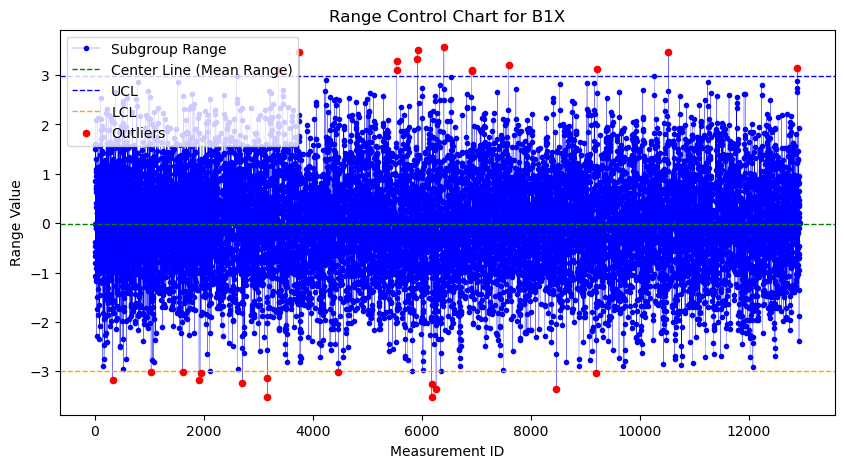

In [32]:

# Calculate mean and standard deviation for the 'Smoothed_Data' column
range_mean = concatenated_sim_data ['B1x'].mean()
range_std = concatenated_sim_data ['B1x'].std()

# Define control limits for the 'Smoothed_Data'
ucl = range_mean + 3 * range_std
lcl = range_mean - 3 * range_std

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(concatenated_sim_data['measurement_id'], concatenated_sim_data['B1x'], marker='o', linestyle='-', color='b', markersize=3, lw=0.2, label='Subgroup Range')
plt.axhline(y=range_mean, color='green', linestyle='--', lw=1, label='Center Line (Mean Range)')
plt.axhline(y=ucl, color='blue', linestyle='--', lw=1, label='UCL')
plt.axhline(y=lcl, color='orange', linestyle='--', lw=1, label='LCL')

# Highlighting outliers
outliers = concatenated_sim_data[(concatenated_sim_data['B1x'] > ucl) | (concatenated_sim_data['B1x'] < lcl)]
plt.scatter(outliers['measurement_id'], outliers['B1x'], color='red', label='Outliers', zorder=5, s=20)

plt.title('Range Control Chart for B1X')
plt.xlabel('Measurement ID')
plt.ylabel('Range Value')
plt.legend()
plt.show()

# Simulation of entire dataset

#### Place your path

In [74]:
file_path = "C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/Raw_data/merged_dataset.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()
df.tail()

,B1x,B1y,B2x,B2y,B3x,B3y,B4x,B4y,time,measurement_id
44154875,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122,2.979213e+06,2155
44154876,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164,2.979213e+06,2155
44154877,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007,2.979213e+06,2155
44154878,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105,2.979213e+06,2155
44154879,-0.098,-0.166,0.012,-0.552,-0.071,0.588,-0.159,0.232,2.979213e+06,2155


#### Put the column you want to simulate in B4y

In [75]:
b3x_data = df[['B4y', 'measurement_id']]
b3x_data

,B4y,measurement_id
0,-0.142,0
1,-0.122,0
2,-0.071,0
3,-0.078,0
4,-0.066,0
...,...,...
44154875,-0.122,2155
44154876,-0.164,2155
44154877,-0.007,2155
44154878,0.105,2155


### Change again the B4Y with the column you want

In [76]:
subgroup_ranges = b3x_data.groupby('measurement_id')['B4y'].apply(lambda x: x.max() - x.min())
subgroup_ranges 

measurement_id
0       0.845
1       0.900
2       0.977
3       0.852
4       0.871
        ...  
2151    1.394
2152    1.616
2153    1.648
2154    1.780
2155    1.685
Name: B4y, Length: 2156, dtype: float64

In [77]:

df_subgroup_ranges_filtered = subgroup_ranges.reset_index()
df_subgroup_ranges_filtered = df_subgroup_ranges_filtered.rename(columns={'index': 'Measurement ID'})
prophet_df= df_subgroup_ranges_filtered
prophet_df.columns = ['ds', 'y']

prophet_df = prophet_df.reset_index(drop=True)


prophet_df

,ds,y
0,0,0.845
1,1,0.900
2,2,0.977
3,3,0.852
4,4,0.871
...,...,...
2151,2151,1.394
2152,2152,1.616
2153,2153,1.648
2154,2154,1.780


In [78]:


# Assuming prophet_df is your existing DataFrame
starting_timestamp = prophet_df['ds'].iloc[0]  # Get the first timestamp

# Generate a new date range with 5-second intervals
new_ds = pd.date_range(start=starting_timestamp, periods=len(prophet_df), freq='1D')

# Replace the old 'ds' column with the new consistent timestamps
prophet_df['ds'] = new_ds

prophet_df

,ds,y
0,1970-01-01,0.845
1,1970-01-02,0.900
2,1970-01-03,0.977
3,1970-01-04,0.852
4,1970-01-05,0.871
...,...,...
2151,1975-11-22,1.394
2152,1975-11-23,1.616
2153,1975-11-24,1.648
2154,1975-11-25,1.780


In [79]:
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

<Axes: xlabel='ds'>

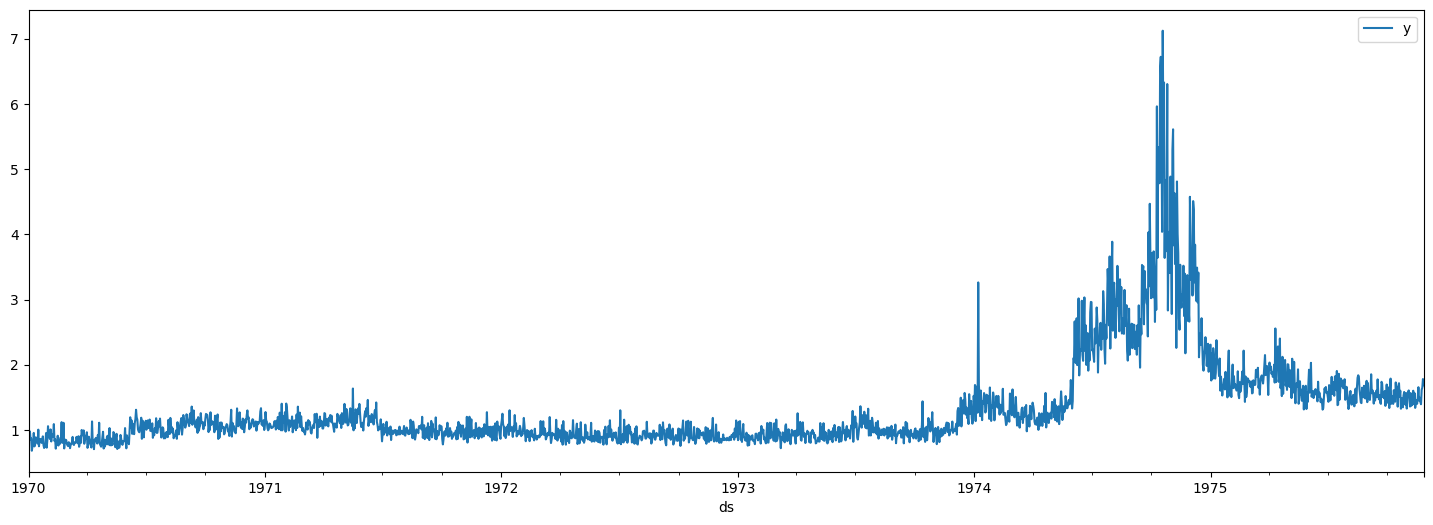

In [80]:
prophet_df.plot(x = 'ds', y = 'y', figsize = (18,6))

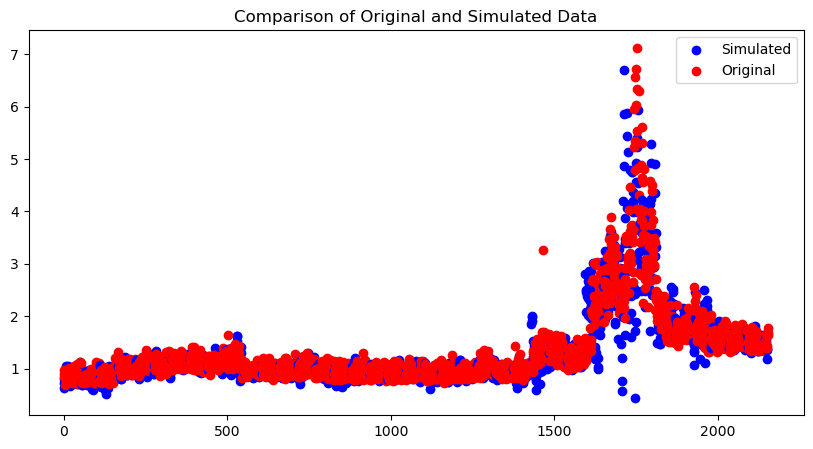

In [81]:


# Data column assumed to be named 'value'
data = prophet_df['y'].values

# Parameters for simulation
interval_length = 55
w = 3  # window size for smoothing

# Preparing the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Process each interval
for start in range(0, len(data), interval_length):
    end = min(start + interval_length, len(data))
    q = data[start:end]
    q_mean = np.mean(q)
    q_std = np.std(q)
    n = len(q)

    # Generate simulated data
    fake_q = np.random.randn(n) * q_std + q_mean

    # Smoothing the fake data
    smooth_fake = []
    for i in range(n - w):
        smooth_fake.append(np.mean(fake_q[i: i + w]))

    smooth_fake = np.array(smooth_fake) * np.sqrt(w) - q_mean * np.sqrt(w) + q_mean

    # Plotting original and simulated data
    ax.scatter(range(start, start + len(smooth_fake)), smooth_fake, color='blue', label='Simulated' if start == 0 else "")
    ax.scatter(range(start, end), q, color='red', label='Original' if start == 0 else "")

ax.legend()
plt.title('Comparison of Original and Simulated Data')
plt.show()


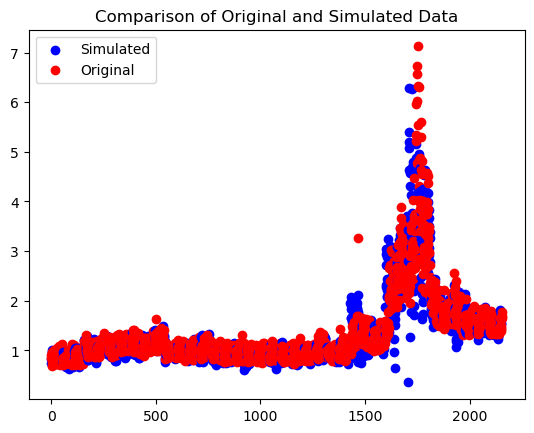

Data has been saved to CSV.


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data column assumed to be named 'value'
data = prophet_df['y'].values

# Parameters for simulation
interval_length = 55
w = 3  # window size for smoothing

# Lists to collect data
original_data = []
simulated_data = []

# Process each interval
for start in range(0, len(data), interval_length):
    end = min(start + interval_length, len(data))
    q = data[start:end]
    q_mean = np.mean(q)
    q_std = np.std(q)
    n = len(q)

    # Generate simulated data
    fake_q = np.random.randn(n) * q_std + q_mean

    # Smoothing the fake data
    smooth_fake = []
    for i in range(n - w):
        smooth_fake.append(np.mean(fake_q[i: i + w]))

    smooth_fake = np.array(smooth_fake) * np.sqrt(w) - q_mean * np.sqrt(w) + q_mean

    # Collect data for saving
    original_data.extend(q)
    simulated_data.extend(smooth_fake)

    # Plotting original and simulated data
    plt.scatter(range(start, start + len(smooth_fake)), smooth_fake, color='blue', label='Simulated' if start == 0 else "")
    plt.scatter(range(start, end), q, color='red', label='Original' if start == 0 else "")

# Saving the data to a CSV file
df = pd.DataFrame({
    'Original': original_data,
    'Simulated': simulated_data + [np.nan] * (len(original_data) - len(simulated_data))  # Ensuring equal length
})
df.to_csv('C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/Simulation_results/sim_B4y_month_6_dataset.csv', index=False)

# Finalizing the plot
plt.legend()
plt.title('Comparison of Original and Simulated Data')
plt.show()

print("Data has been saved to CSV.")


# concatenate everything and save dataset as csv


Shape of the merged DataFrame: (12336, 8)
First few rows of the merged DataFrame:
     B1x    B1y    B2x    B2y    B3x    B3y    B4x    B4y
0  0.845  1.108  1.033  0.786  1.265  0.662  1.199  0.896
1  0.900  1.042  0.936  0.867  1.072  0.796  0.993  1.059
2  0.977  0.940  0.952  0.718  1.018  0.657  0.984  0.987
3  0.852  1.055  0.884  0.727  1.009  0.591  1.036  0.874
4  0.871  1.011  1.074  0.837  0.923  0.591  1.055  0.998
Total number of NaN values in the merged DataFrame: 0


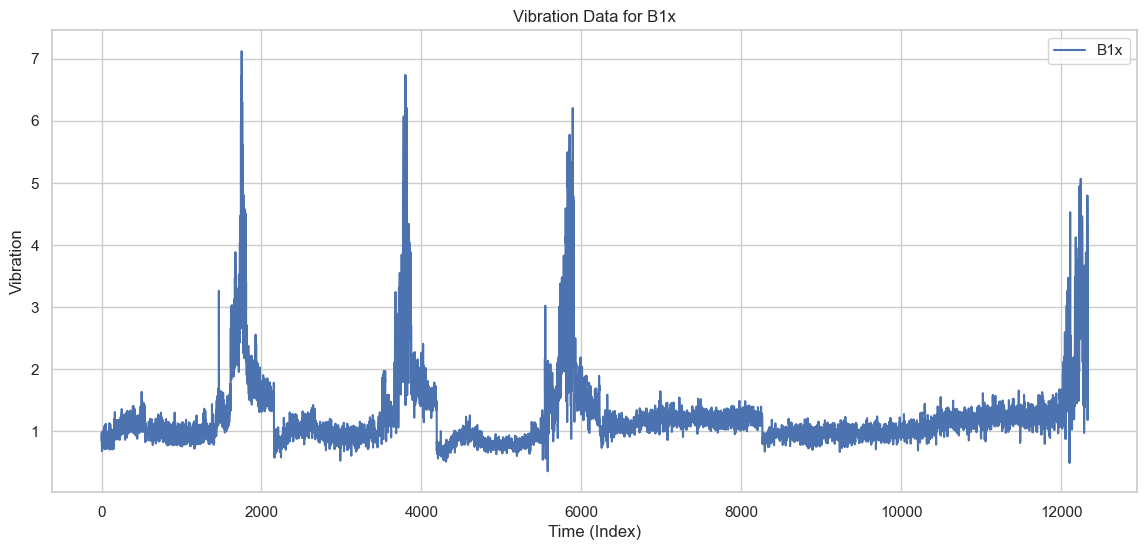

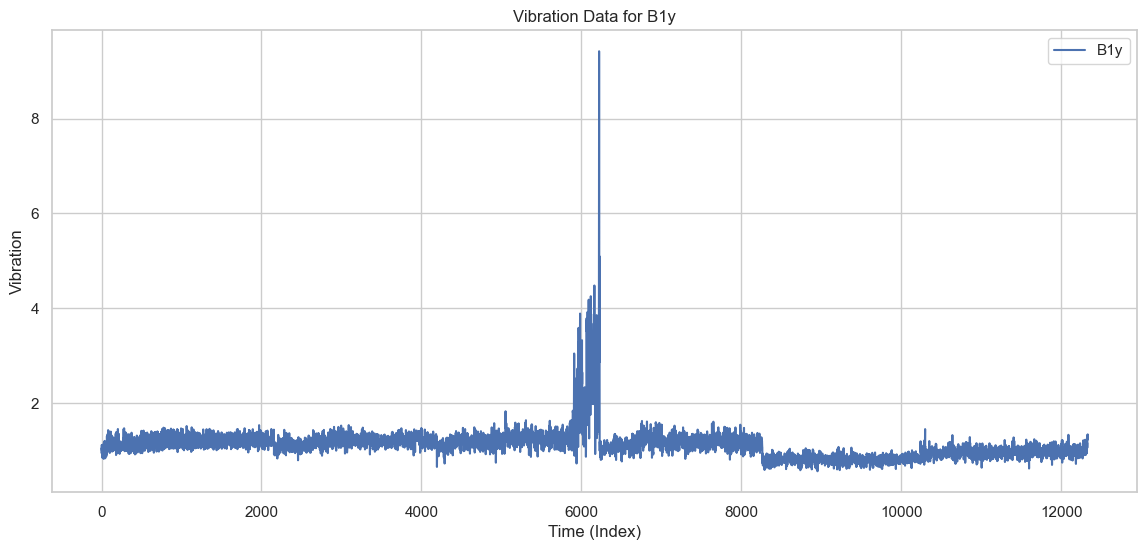

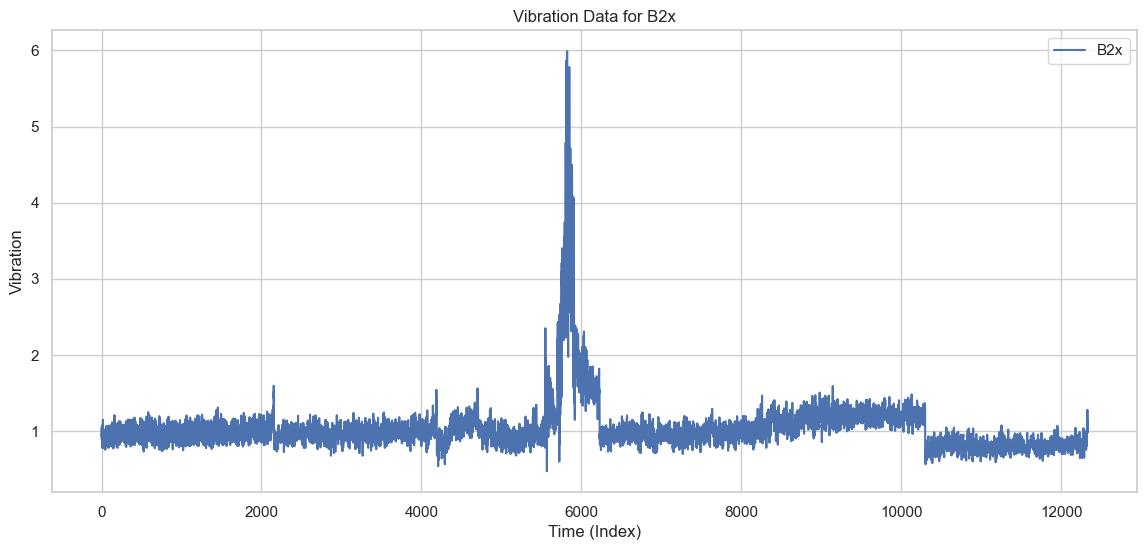

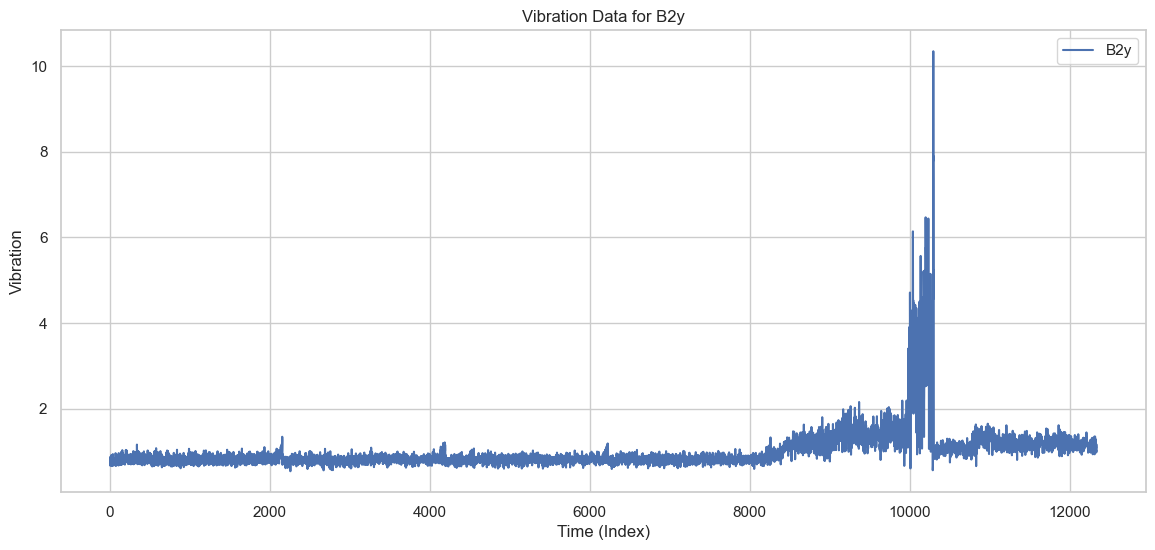

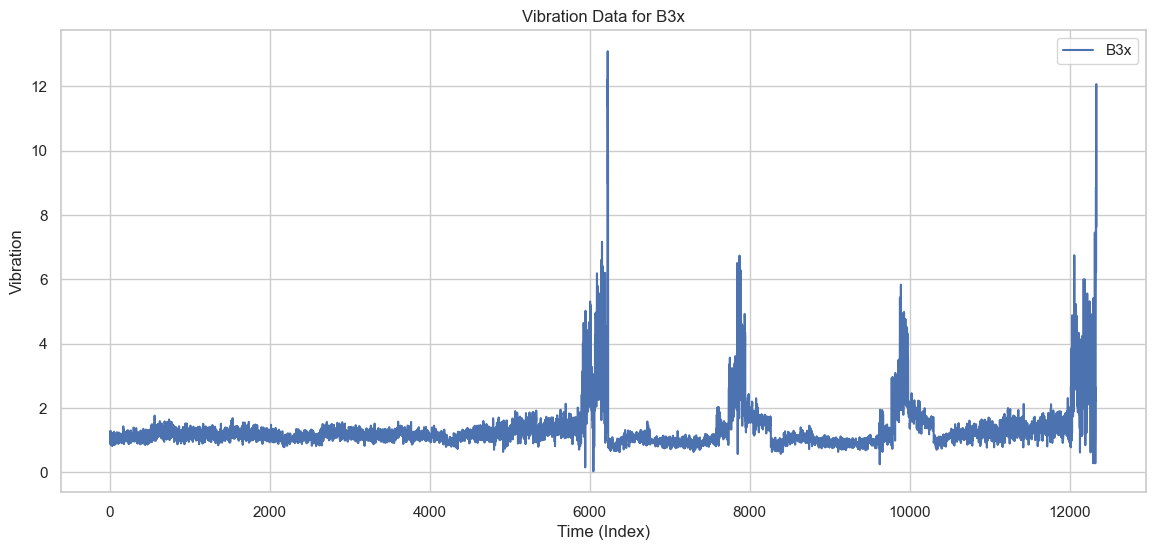

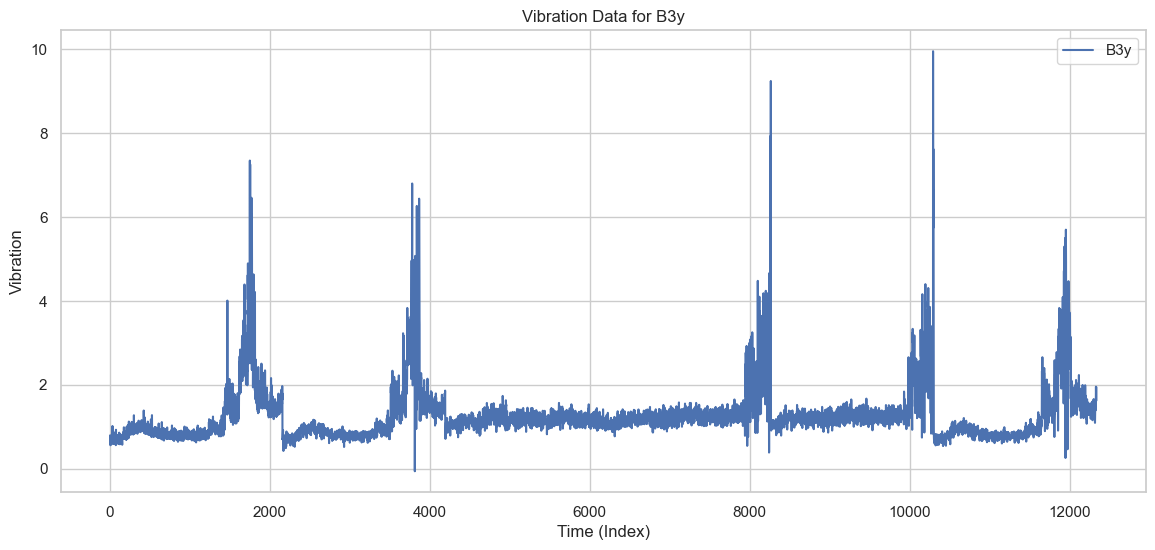

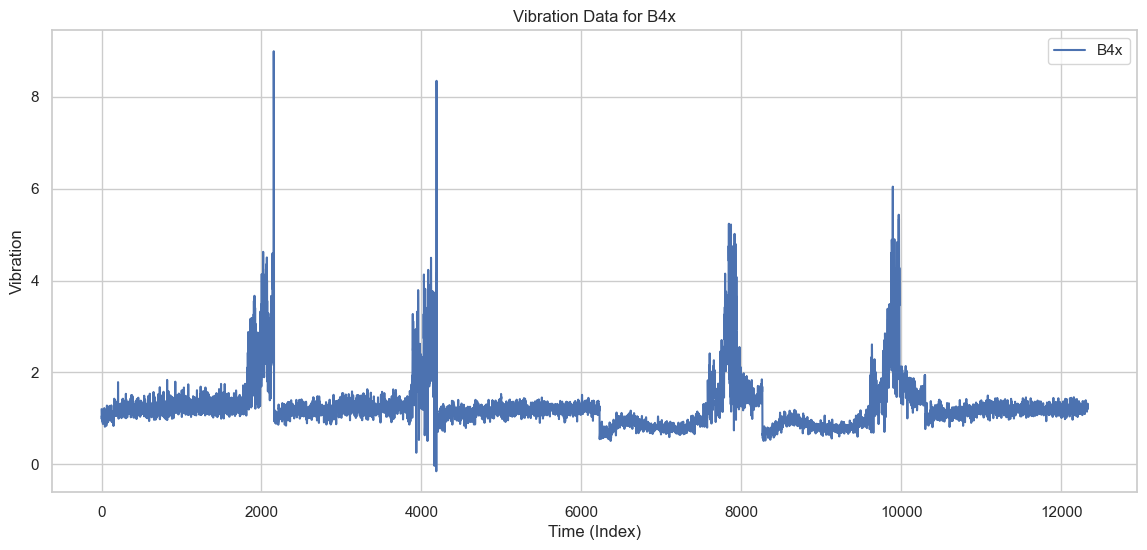

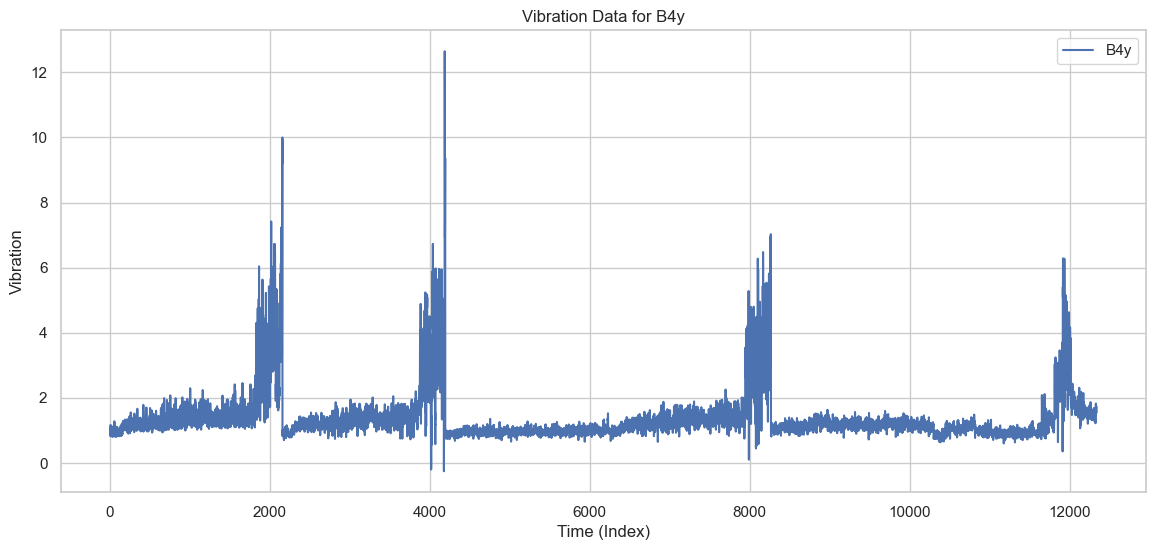

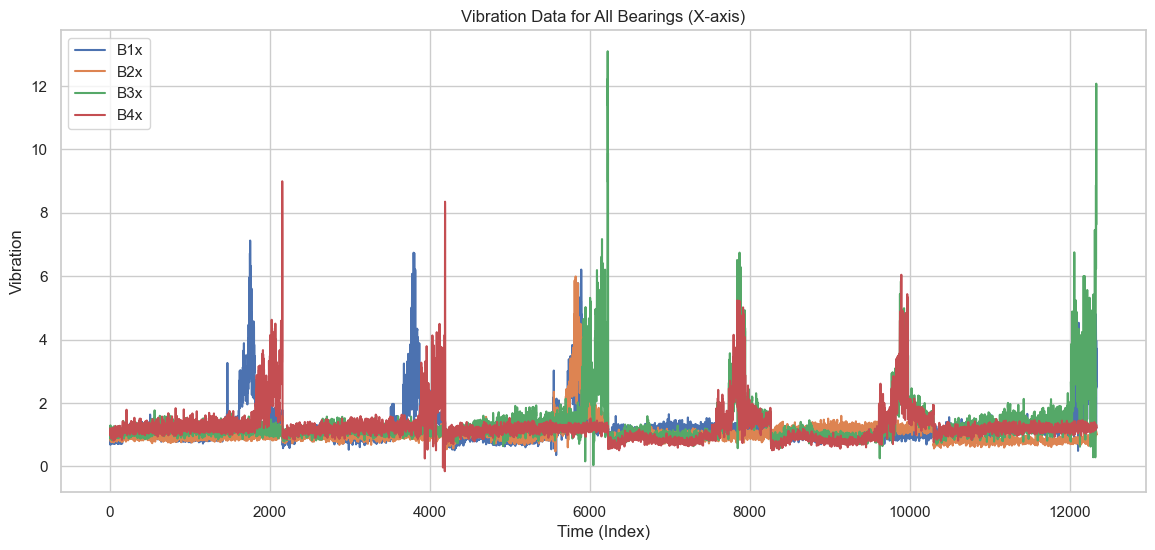

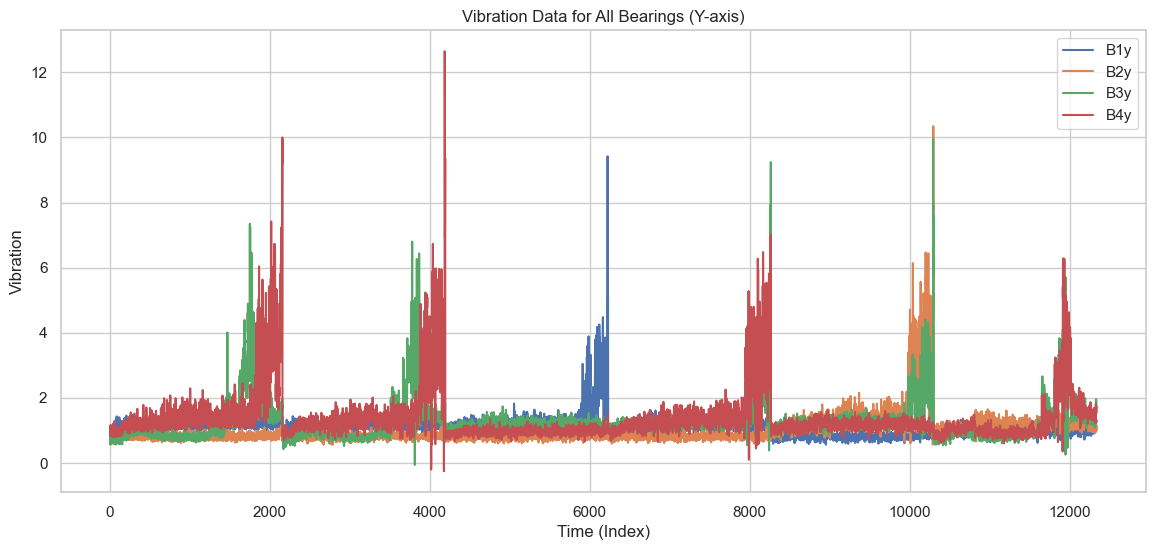

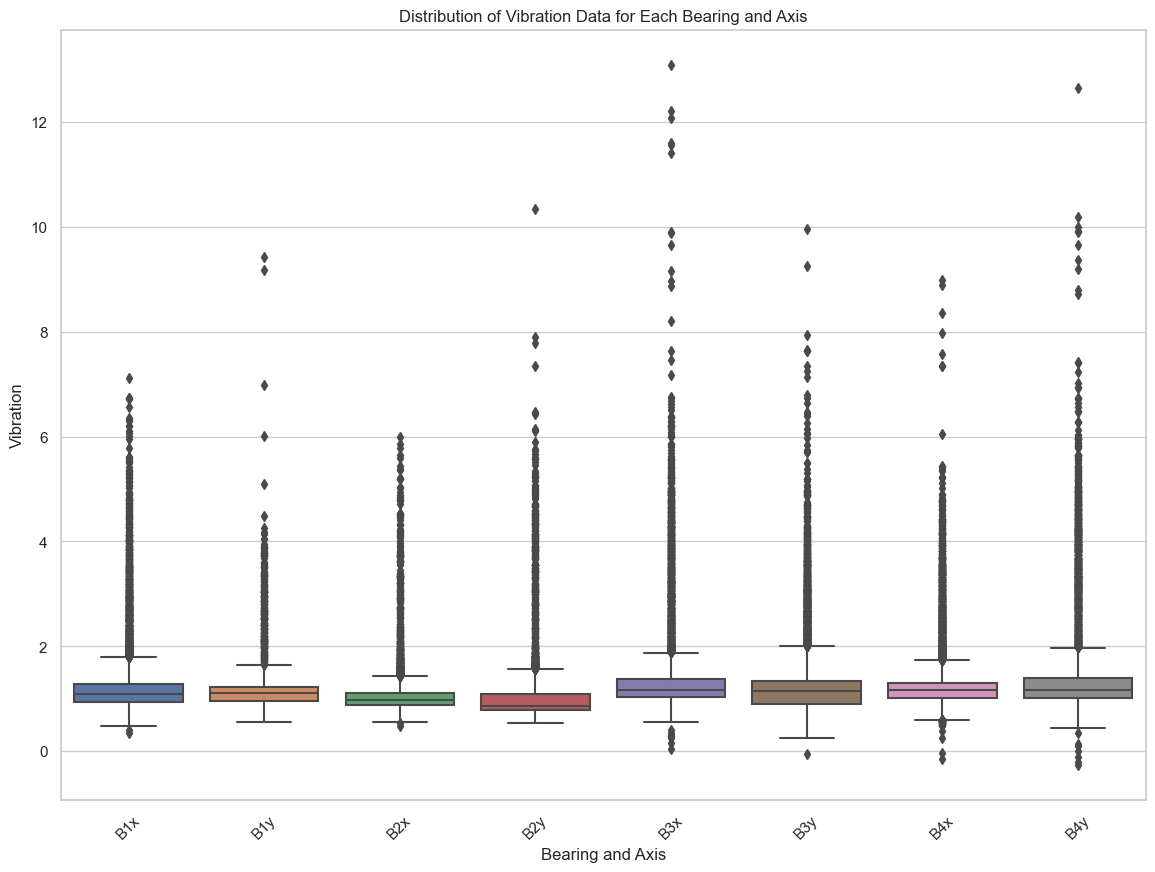

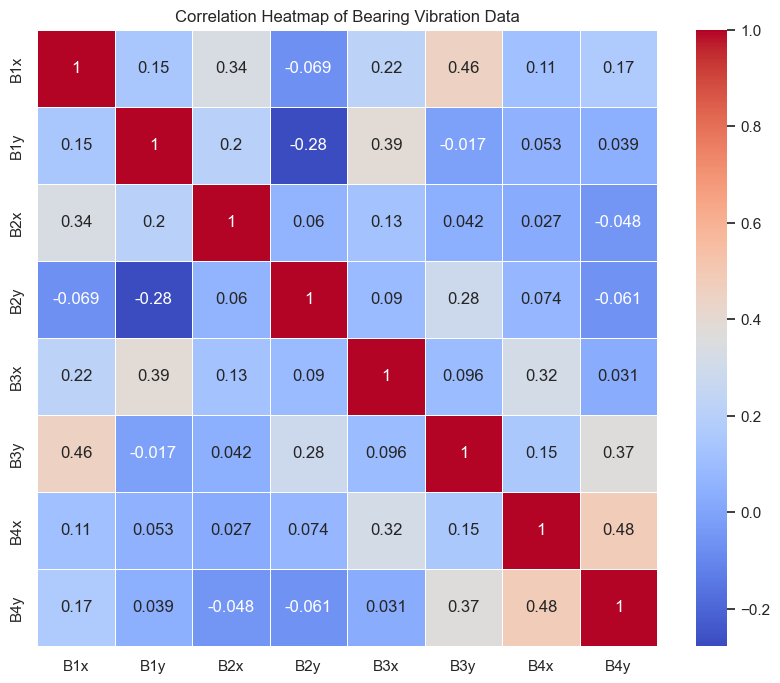

In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your dataset directory
data_path = 'C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/Simulation_results'

# List of files to process
files = [
    'sim_B1x_month_2_dataset.csv', 'sim_B1x_month_3_dataset.csv', 'sim_B1x_month_4_dataset.csv', 
    'sim_B1x_month_5_dataset.csv', 'sim_B1x_month_6_dataset.csv', 'sim_B1y_month_2_dataset.csv', 
    'sim_B1y_month_3_dataset.csv', 'sim_B1y_month_4_dataset.csv', 'sim_B1y_month_5_dataset.csv', 
    'sim_B1y_month_6_dataset.csv', 'sim_B2x_month_2_dataset.csv', 'sim_B2x_month_3_dataset.csv', 
    'sim_B2x_month_4_dataset.csv', 'sim_B2x_month_5_dataset.csv', 'sim_B2x_month_6_dataset.csv', 
    'sim_B2y_month_2_dataset.csv', 'sim_B2y_month_3_dataset.csv', 'sim_B2y_month_4_dataset.csv', 
    'sim_B2y_month_5_dataset.csv', 'sim_B2y_month_6_dataset.csv', 'sim_B3x_month_2_dataset.csv', 
    'sim_B3x_month_3_dataset.csv', 'sim_B3x_month_4_dataset.csv', 'sim_B3x_month_5_dataset.csv', 
    'sim_B3x_month_6_dataset.csv', 'sim_B3y_month_2_dataset.csv', 'sim_B3y_month_3_dataset.csv', 
    'sim_B3y_month_4_dataset.csv', 'sim_B3y_month_5_dataset.csv', 'sim_B3y_month_6_dataset.csv', 
    'sim_B4x_month_2_dataset.csv', 'sim_B4x_month_3_dataset.csv', 'sim_B4x_month_4_dataset.csv', 
    'sim_B4x_month_5_dataset.csv', 'sim_B4x_month_6_dataset.csv', 'sim_B4y_month_2_dataset.csv', 
    'sim_B4y_month_3_dataset.csv', 'sim_B4y_month_4_dataset.csv', 'sim_B4y_month_5_dataset.csv', 
    'sim_B4y_month_6_dataset.csv'
]

# Initialize a dictionary to hold data frames for each bearing and axis
data = {
    'B1x': [], 'B1y': [],
    'B2x': [], 'B2y': [],
    'B3x': [], 'B3y': [],
    'B4x': [], 'B4y': []
}

# Function to read initial data (first column of the first dataset for each bearing and axis)
def read_initial_data(files):
    initial_data = {}
    for file in files:
        bearing_axis = file.split('_')[1]
        if bearing_axis not in initial_data:
            df = pd.read_csv(os.path.join(data_path, file))
            initial_data[bearing_axis] = df.iloc[:, 0]
    return initial_data

# Read the initial data
initial_data = read_initial_data(files)

# Read each file and append the second column to the respective list in the dictionary
for file in files:
    bearing_axis = file.split('_')[1]
    df = pd.read_csv(os.path.join(data_path, file))
    data[bearing_axis].append(df.iloc[:, 1])

# Concatenate the initial data with the data for each bearing and axis
concatenated_data = {}
for key, value in data.items():
    concatenated_data[key] = pd.concat([initial_data[key]] + value, axis=0).reset_index(drop=True)

# Combine all concatenated data into a single DataFrame
final_df = pd.DataFrame(concatenated_data)

# Drop NaN values from the merged data
final_df = final_df.dropna()

# Save the merged data to a new CSV file
final_df.to_csv('C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/merged_bearing_data.csv', index=False)

# Load the merged data
merged_df = pd.read_csv('C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/Simulation_results/merged_bearing_data.csv')

# Check the shape of the merged DataFrame
print("Shape of the merged DataFrame:", merged_df.shape)

# Display the first few rows of the merged DataFrame
print("First few rows of the merged DataFrame:")
print(merged_df.head())

# Check for any NaN values
nan_count = merged_df.isna().sum().sum()
print(f"Total number of NaN values in the merged DataFrame: {nan_count}")

# Plot settings
sns.set(style="whitegrid")

# Plot individual bearings and axes over time
def plot_bearing_data(df, bearing, axis):
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df, x=df.index, y=f'{bearing}{axis}', label=f'{bearing}{axis}')
    plt.title(f'Vibration Data for {bearing}{axis}')
    plt.xlabel('Time (Index)')
    plt.ylabel('Vibration')
    plt.legend()
    plt.show()

# Plot all bearings and axes
bearings = ['B1', 'B2', 'B3', 'B4']
axes = ['x', 'y']

for bearing in bearings:
    for axis in axes:
        plot_bearing_data(merged_df, bearing, axis)

# Plot all bearings' x-axis data in a single plot
plt.figure(figsize=(14, 6))
for bearing in bearings:
    sns.lineplot(data=merged_df, x=merged_df.index, y=f'{bearing}x', label=f'{bearing}x')
plt.title('Vibration Data for All Bearings (X-axis)')
plt.xlabel('Time (Index)')
plt.ylabel('Vibration')
plt.legend()
plt.show()

# Plot all bearings' y-axis data in a single plot
plt.figure(figsize=(14, 6))
for bearing in bearings:
    sns.lineplot(data=merged_df, x=merged_df.index, y=f'{bearing}y', label=f'{bearing}y')
plt.title('Vibration Data for All Bearings (Y-axis)')
plt.xlabel('Time (Index)')
plt.ylabel('Vibration')
plt.legend()
plt.show()

# Boxplot to visualize the distribution of vibration data for each bearing and axis
plt.figure(figsize=(14, 10))
data_to_plot = merged_df.melt(var_name='Bearing_Axis', value_name='Vibration')
sns.boxplot(x='Bearing_Axis', y='Vibration', data=data_to_plot)
plt.title('Distribution of Vibration Data for Each Bearing and Axis')
plt.xlabel('Bearing and Axis')
plt.ylabel('Vibration')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap to identify relationships between bearings
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Bearing Vibration Data')
plt.show()
